# Comparaison des différents modèles : classification binaire COVID / AUTRE par extraction de features

In [1]:
# Chargement des modules necessaires :

import os

import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
from tensorflow.keras.models import Model
from tensorflow.keras.models import load_model

In [2]:
# On declare les chemins vers les données :

dataDir = 'Data'
 
# On declare les dimensions pour les images (224,224) :
img_width, img_height = 224, 224

# On liste et stocke les chemins des images :
ImageCOVID = os.listdir(dataDir + '/A_COVID')
ImageAUTRE = os.listdir(dataDir + '/B_AUTRE')


# On affiche le nombre d'images trouvées :
print('Il y a ' + str(len(ImageCOVID)) + ' images de patients covid.') 
print('Il y a ' + str(len(ImageAUTRE)) + ' images de patients autres.') 

Il y a 1143 images  de patient covid.
Il y a 2686 images de patient autre.


COVID


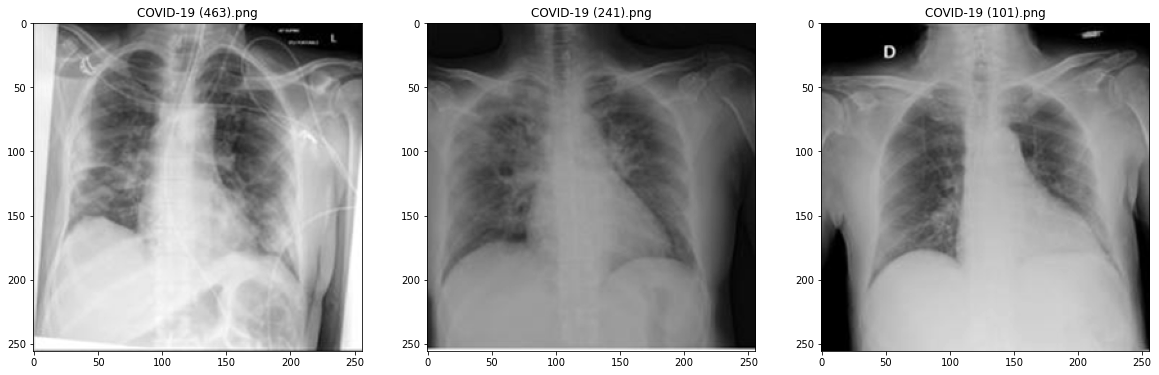

AUTRE


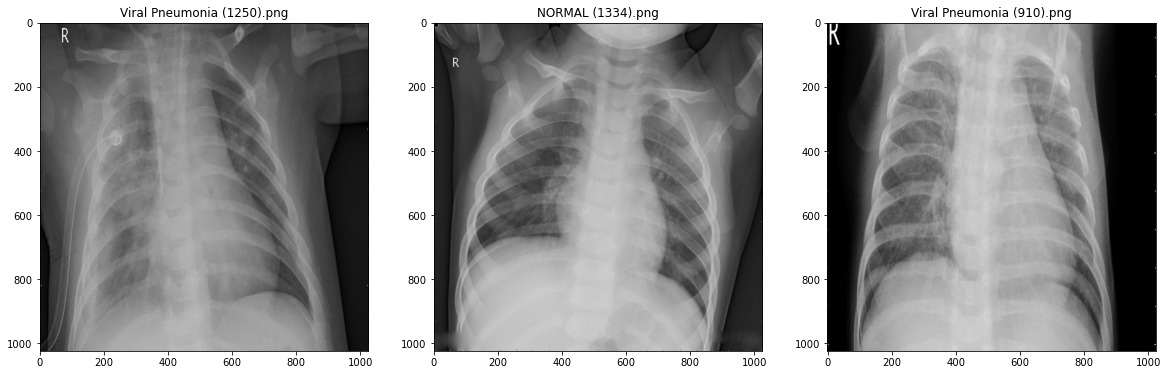

In [4]:
# Visualisation de 6 exemples en 2 lignes et 3 colonnes pour chaque classe :

print("COVID")

# COVID  :

plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageCOVID = random.choice(os.listdir(dataDir + '/A_COVID'))
    plt.imshow(plt.imread(os.path.join( dataDir +'/A_COVID',randomImageCOVID)), cmap='gray')
    plt.title(randomImageCOVID)
    
plt.show()

print("AUTRE")

# AUTRE :
plt.figure(figsize=(20,10))
for i in range(3):
    plt.subplot(1, 3, i + 1)
    randomImageAUTRE = random.choice(os.listdir(dataDir + '/B_AUTRE'))
    plt.imshow(plt.imread(os.path.join( dataDir +'/B_AUTRE',randomImageAUTRE)), cmap='gray')
    plt.title(randomImageAUTRE)
    
plt.show()



In [3]:
# Pré-processing :
# On rescale les images :
datagen = ImageDataGenerator(rescale=1./255)

# On definit la batch size :
batch_size = 32

# On prepare les tableaux de données depuis les images :
test_generator = datagen.flow_from_directory(
        dataDir,
        target_size=(img_width, img_height),
        shuffle=False,
        batch_size=batch_size)

Found 3829 images belonging to 2 classes.


In [2]:
# Chargement de VGG16 sans la partie fully-connected avec le réseau convolutif entrainé sur imagenet :

model_vgg = applications.VGG16(include_top=False, weights='imagenet')

In [3]:
# Chargement de XCEPTION sans la partie fully-connected avec le reseau convolutif :

model_XCEPTION = applications.Xception(include_top=False, weights='imagenet')

In [4]:
# Chargement de DENSE121 sans la partie fully-connected avec le reseau convolutif :

model_dense = applications.DenseNet121(include_top=False, weights='imagenet')

In [ ]:
# On utilise le modèle VGG16 pour extraire les features de nos images 
# on récupère la sortie du réseau convolutionnel :
data_features_VGG16 = model_vgg.predict_generator(test_generator, 3829 // batch_size)

# L'opération étant longue on enregistre les features obtenues :
np.save(open('models/dataFeatures_VGG16_AllData_autre.npy', 'wb'), data_features_VGG16) # écriture en binaire nécessaire

In [ ]:
# On utilise le modèle XCEPTION pour extraire les features de nos images 
# on récupère la sortie du réseau convolutionnel :

data_features_XCEPTION = model_XCEPTION.predict_generator(test_generator, 3829 // batch_size)

np.save(open('models/dataFeatures_XCEPTION_AllData_autre.npy', 'wb'), data_features_XCEPTION)


In [ ]:
# On utilse le modèle DENSE121 pour extraire les features de nos images 
# on récupère la sortie du réseau convolutionnel :
data_features_DENSE121 = model_dense.predict_generator(test_generator, 3829 // batch_size)

np.save(open('models/dataFeatures_DENSE121_AllData_autres.npy', 'wb'), data_features_DENSE121) # ecriture en binaire necessaire


In [5]:
# Si l'operation à déjà été effectuée on charge les features :

data_features_VGG16 = np.load(open('models/dataFeatures_VGG16_AllData_autres.npy', 'rb'))

In [6]:
data_features_XCEPTION = np.load(open('models/dataFeatures_XCEPTION_AllData_autres.npy', 'rb'))

In [7]:
data_features_DENSE121 = np.load(open('models/dataFeatures_DENSE121_AllData_autres.npy', 'rb'))

In [14]:
# On definit les labels :

data_labels = np.array([0] * 1143 + [1] * 2665)
data_samples = 3829 # 3808

In [9]:
#Récupération des modèles avec les différentes couches fully connected

model_SCRATCH = tf.keras.models.load_model('../memory/FullModels/scratch_224_224_10G')

In [15]:
model_VGG16_heavy = tf.keras.models.load_model('../memory/FullModels/vgg16_heavyTop_224_224_10G')
model_VGG16_medium = tf.keras.models.load_model('../memory/FullModels/vgg16_mediumTop_224_224_10G')
model_VGG16_light = tf.keras.models.load_model('../memory/FullModels/vgg16_lightTop_224_224_10G')

In [16]:
model_XCEPTION_heavy = tf.keras.models.load_model('../memory/FullModels/xception_heavyTop_224_224_10G')
model_XCEPTION_medium = tf.keras.models.load_model('../memory/FullModels/xception_mediumTop_224_224_10G')
model_XCEPTION_light = tf.keras.models.load_model('../memory/FullModels/xception_lightTop_224_224_10G')

In [17]:
model_DENSE121_heavy = tf.keras.models.load_model('../memory/FullModels/dense121_heavyTop_224_224_10G')
model_DENSE121_medium = tf.keras.models.load_model('../memory/FullModels/dense121_mediumTop_224_224_10G')
model_DENSE121_light = tf.keras.models.load_model('../memory/FullModels/dense121_lightTop_224_224_10G')

In [6]:
#On évalue les modèles 

test_generator2 = datagen.flow_from_directory(
        dataDir,
        target_size=(img_width, img_height),
        class_mode='binary',
        batch_size=batch_size)

#from_scratch
print ("SCRATCH evaluations:")
eval_SCRATCH = model_SCRATCH.evaluate_generator(test_generator2, 3829//32)

Found 3829 images belonging to 2 classes.
SCRATCH evaluations:


In [7]:
print(eval_SCRATCH)

[0.20158148041198484, 0.9319853]


In [18]:
#VGG16
print ("VGG16 evaluations:")
eval_VGG16_heavy = model_VGG16_heavy.evaluate(data_features_VGG16, data_labels,verbose=2)
eval_VGG16_medium = model_VGG16_medium.evaluate(data_features_VGG16, data_labels,verbose=2)
eval_VGG16_light = model_VGG16_light.evaluate(data_features_VGG16, data_labels,verbose=2)

VGG16 evaluations:
119/119 - 2s - loss: 0.3355 - accuracy: 0.9081
119/119 - 1s - loss: 0.1915 - accuracy: 0.9401
119/119 - 0s - loss: 0.2600 - accuracy: 0.9112


In [19]:

#XCEPTION
print ("XCEPTION evaluations:")
eval_XCEPTION_heavy = model_XCEPTION_heavy.evaluate(data_features_XCEPTION, data_labels,verbose=2)
eval_XCEPTION_medium = model_XCEPTION_medium.evaluate(data_features_XCEPTION, data_labels,verbose=2)
eval_XCEPTION_light = model_XCEPTION_light.evaluate(data_features_XCEPTION, data_labels,verbose=2)

XCEPTION evaluations:
119/119 - 7s - loss: 1.2300 - accuracy: 0.9196
119/119 - 3s - loss: 0.7107 - accuracy: 0.8676
119/119 - 2s - loss: 0.4803 - accuracy: 0.9186


In [22]:
#DENSE121
print ("DENSE121 evaluations:")
eval_DENSE121_heavy = model_DENSE121_heavy.evaluate(data_features_DENSE121, data_labels,verbose=2)
eval_DENSE121_medium = model_DENSE121_medium.evaluate(data_features_DENSE121, data_labels,verbose=2)
eval_DENSE121_light = model_DENSE121_light.evaluate(data_features_DENSE121, data_labels,verbose=2)

DENSE121 evaluations:
119/119 - 3s - loss: 0.5929 - accuracy: 0.9601
119/119 - 1s - loss: 0.2685 - accuracy: 0.9622
119/119 - 1s - loss: 0.5823 - accuracy: 0.9336


## Visualisation de l'évaluation

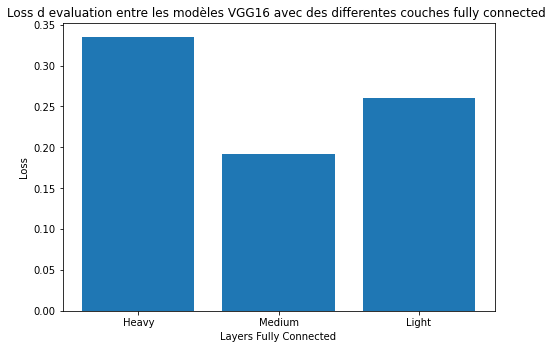

In [23]:
#Visualisation de la loss pour le modèle VGG16:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_VGG16_heavy[0],eval_VGG16_medium[0],eval_VGG16_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation entre les modèles VGG16 avec des differentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

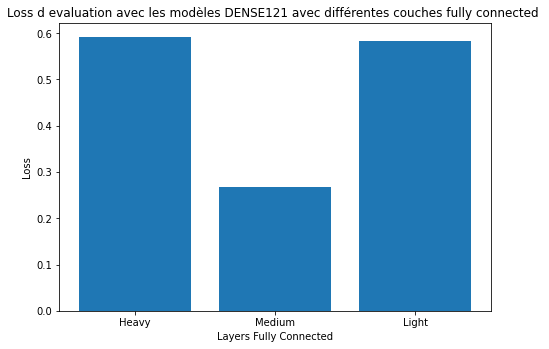

In [24]:
#Visualisation de la loss pour le modèle DENSE121:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_DENSE121_heavy[0],eval_DENSE121_medium[0],eval_DENSE121_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation avec les modèles DENSE121 avec différentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

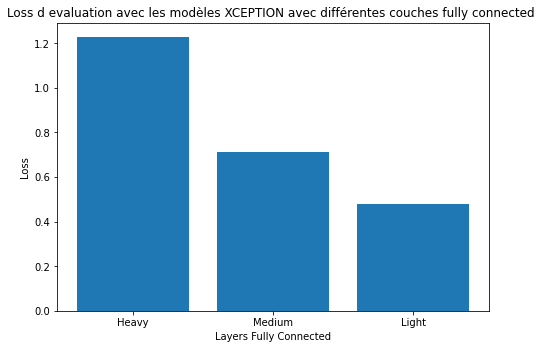

In [25]:
#Visualisation de la loss pour le modèle XCEPTION:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_XCEPTION_heavy[0],eval_XCEPTION_medium[0],eval_XCEPTION_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation avec les modèles XCEPTION avec différentes couches fully connected ')
plt.xlabel('Layers Fully Connected')
plt.ylabel('Loss')
plt.show()

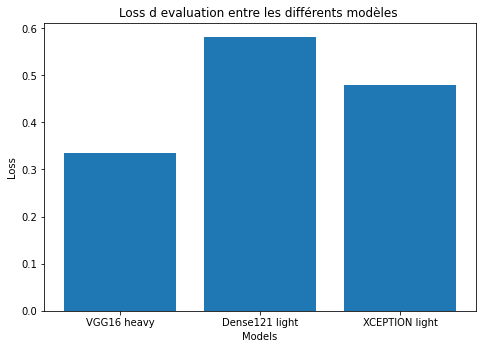

In [26]:
#Choix des 3 meilleurs modèles

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['VGG16 heavy','Dense121 light','XCEPTION light']
values = [eval_VGG16_heavy[0],eval_DENSE121_light[0],eval_XCEPTION_light[0]]
ax.bar(labels,values)
plt.title('Loss d evaluation entre les différents modèles ')
plt.xlabel('Models')
plt.ylabel('Loss')
plt.show()

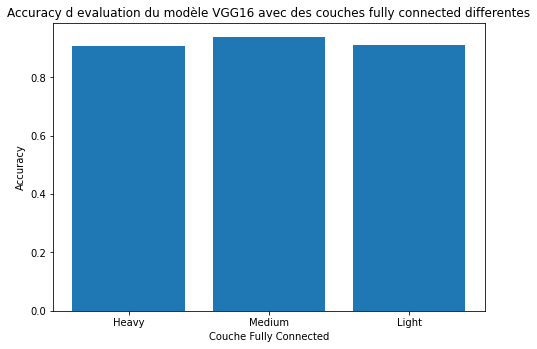

In [27]:
#Visualisation de l'accuracy pour le modèle VGG16:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_VGG16_heavy[1],eval_VGG16_medium[1],eval_VGG16_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle VGG16 avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()

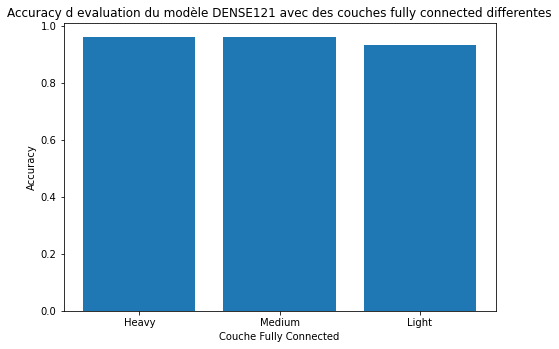

In [28]:
#Visualisation de l'accuracy pour le modèle DENSE121:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_DENSE121_heavy[1],eval_DENSE121_medium[1],eval_DENSE121_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle DENSE121 avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()

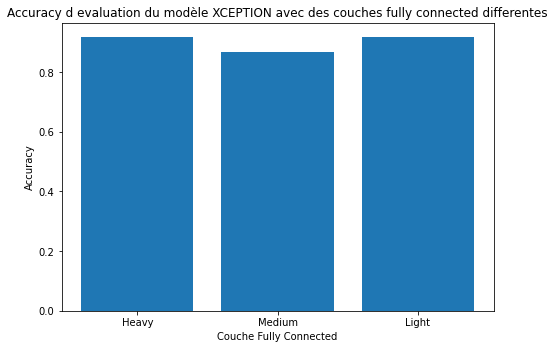

In [29]:
#Visualisation de l'accuracy pour le modèle XCEPTION

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['Heavy', 'Medium','Light']
values = [eval_XCEPTION_heavy[1],eval_XCEPTION_medium[1],eval_XCEPTION_light[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation du modèle XCEPTION avec des couches fully connected differentes')
plt.xlabel('Couche Fully Connected')
plt.ylabel('Accuracy')
plt.show()

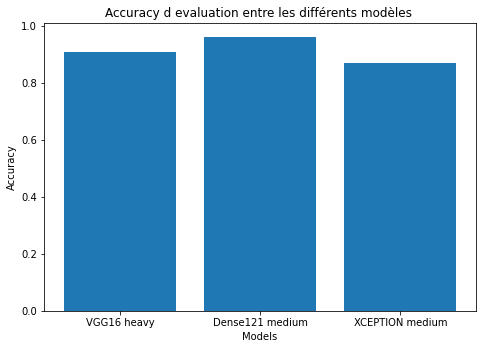

In [30]:
#Choix des 3 meilleurs modèles

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
labels = ['VGG16 heavy','Dense121 medium','XCEPTION medium']
values = [eval_VGG16_heavy[1],eval_DENSE121_medium[1],eval_XCEPTION_medium[1]]
ax.bar(labels,values)
plt.title('Accuracy d evaluation entre les différents modèles ')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.show()